<a href="https://colab.research.google.com/github/dudrill/Orange-and-python/blob/main/%D0%98%D1%81%D1%82%D0%B8%D0%BD%D0%B0_%D0%B2_%D0%B2%D0%B8%D0%BD%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Предсказание цены на вино

Сначала идут скриншоты из Orange, потом тот же результат в качестве тренировки продублирован на языке Python.

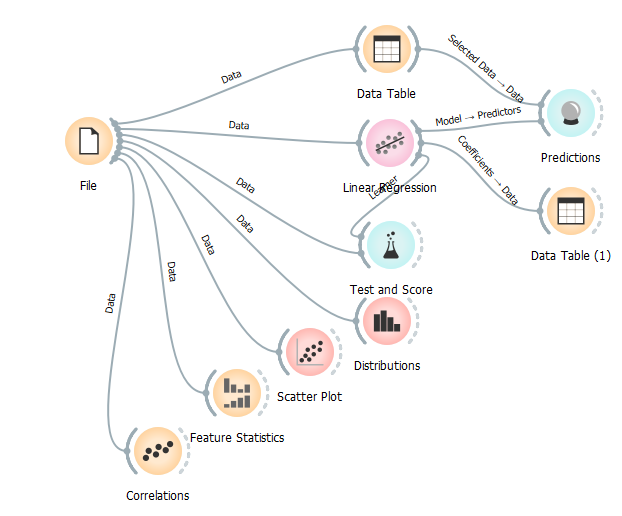

In [ ]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from statsmodels.formula.api import ols

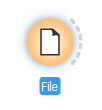

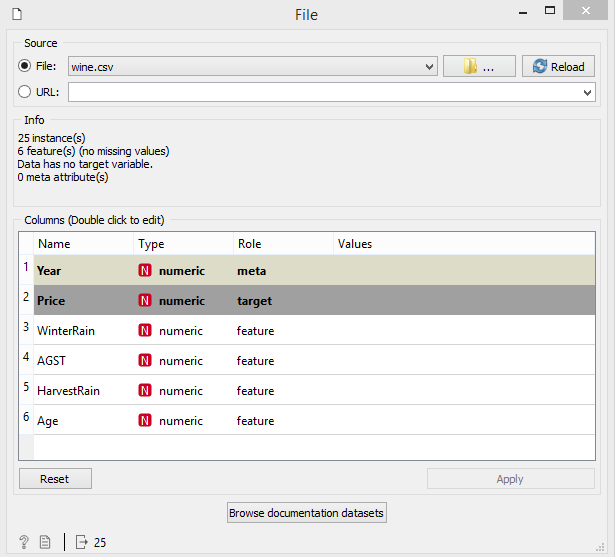

In [ ]:
wine = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Orange/csv/wine.csv', sep = ',')

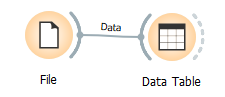

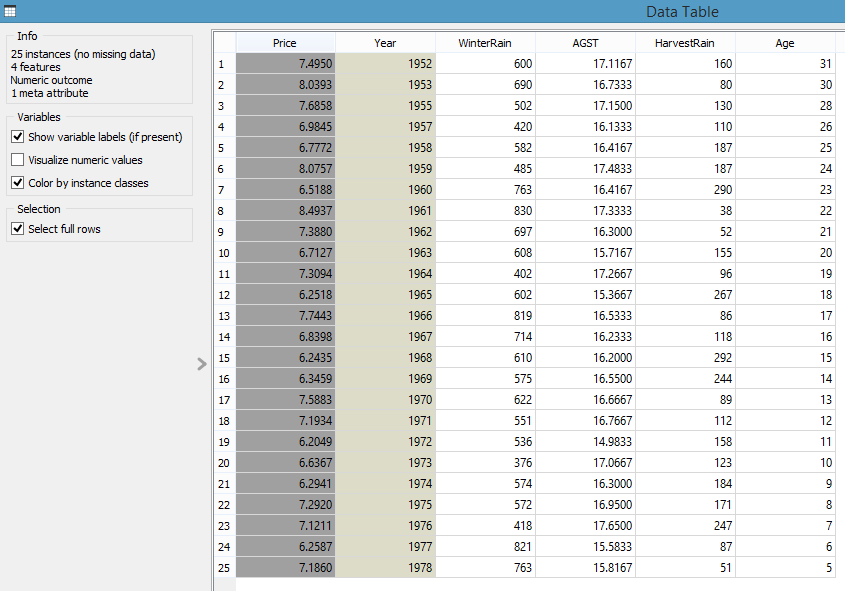

In [ ]:
# заголовки в нижний регистр для удобства
wine.columns = wine.columns.str.lower()
wine

,year,price,winterrain,agst,harvestrain,age
0,1952,7.4950,600,17.1167,160,31
1,1953,8.0393,690,16.7333,80,30
2,1955,7.6858,502,17.1500,130,28
3,1957,6.9845,420,16.1333,110,26
4,1958,6.7772,582,16.4167,187,25
5,1959,8.0757,485,17.4833,187,24
6,1960,6.5188,763,16.4167,290,23
7,1961,8.4937,830,17.3333,38,22
8,1962,7.3880,697,16.3000,52,21
9,1963,6.7127,608,15.7167,155,20


In [ ]:
wine.columns

Index(['year', 'price', 'winterrain', 'agst', 'harvestrain', 'age'], dtype='object')

'year'- год, 'price' - цена, 'winterrain' - осадки зимой, 'agst' - среднесезонная температура, 'harvestrain' - осадки летом, 'age' - возраст вина

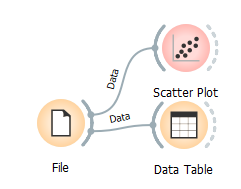

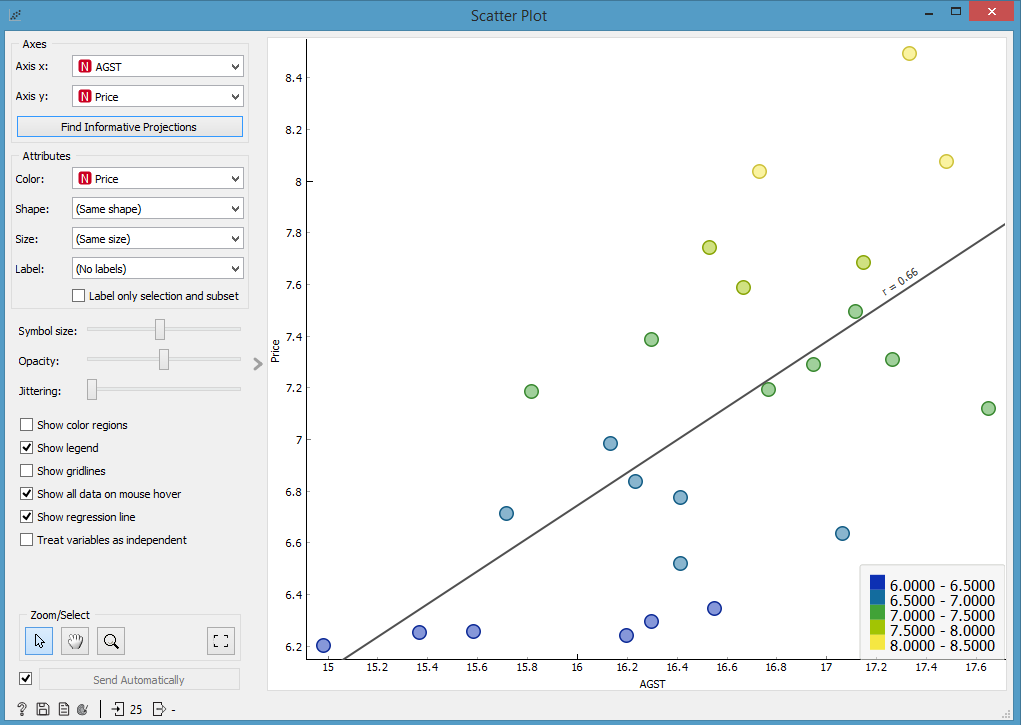

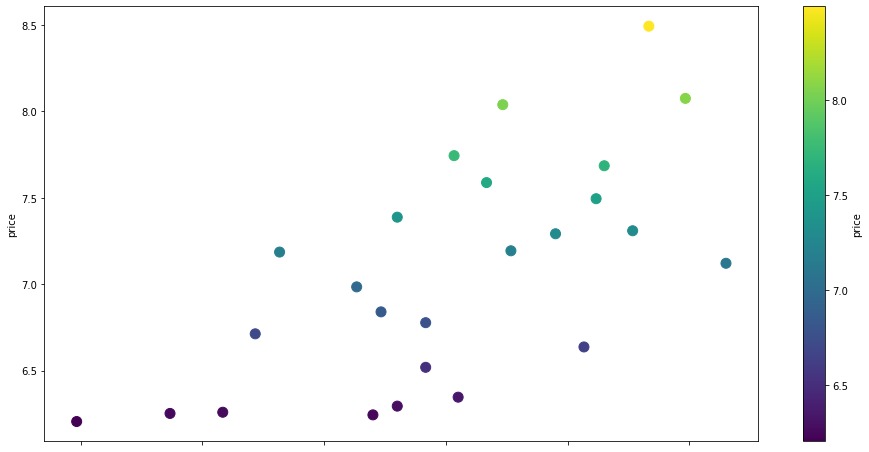

In [ ]:
# s-величина точки
wine.plot.scatter(x='agst',y='price',c='price',colormap='viridis', figsize=(16, 8), s=100);

In [ ]:
# корреляция пирсона
r, p_value = stats.pearsonr(wine.agst,wine.price)
print(r,p_value)

0.6595628611435908 0.0003350494895241972


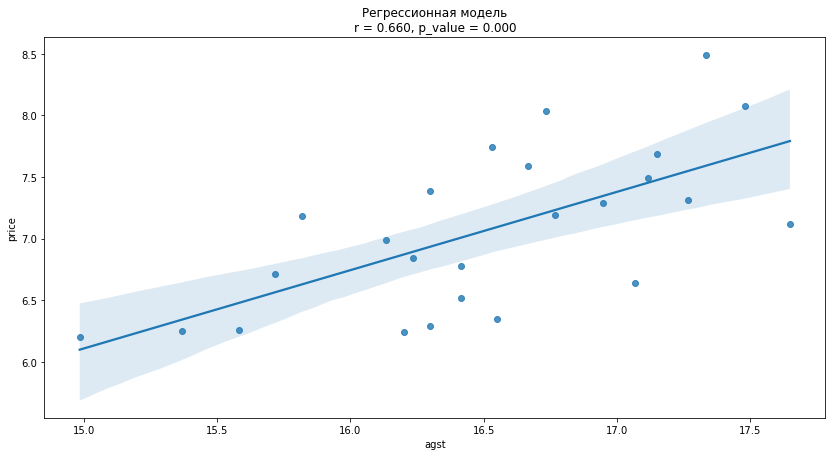

In [ ]:
# в regplot можно впихнуть все (списки и кортежи Python, массивы NumPy, серии Pandas)
fig, ax = plt.subplots(figsize=(14, 7))
ax.set_title('Регрессионная модель\nr = %.3f, p_value = %.3f' % (r, p_value))
sns.regplot(x='agst',y='price',data=wine);

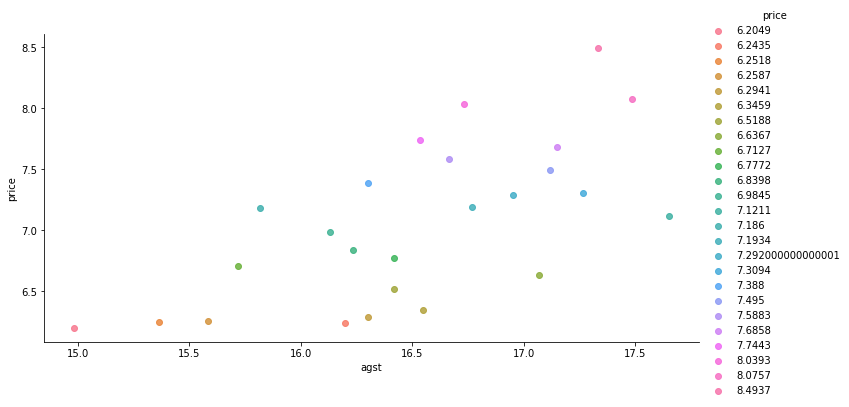

In [ ]:
# в lmplot только данные с датафрейма
sns.lmplot(x='agst',y='price',hue='price', height=5, aspect=2, data=wine);

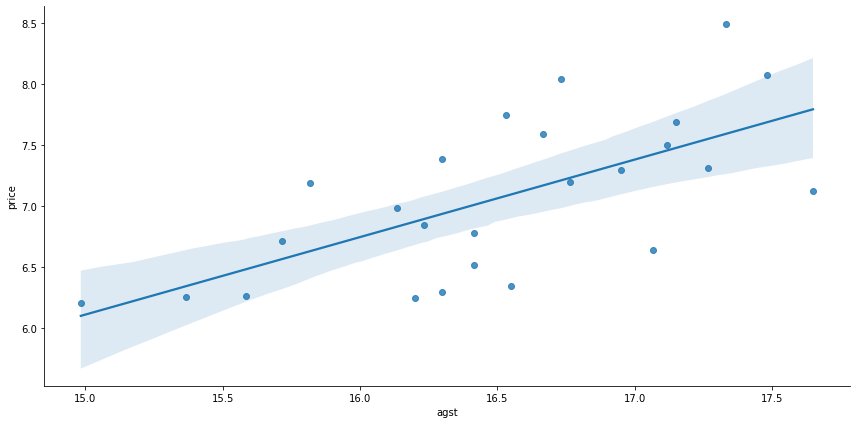

In [ ]:
sns.lmplot(x='agst',y='price',height=6, aspect=2, data=wine);

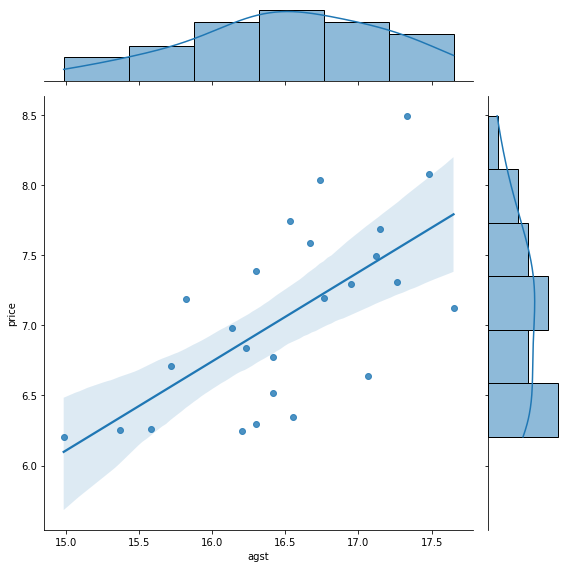

In [ ]:
sns.jointplot(x='agst',y='price' ,height=8, data=wine, kind='reg');

In [ ]:
wine.columns

Index(['year', 'price', 'winterrain', 'agst', 'harvestrain', 'age'], dtype='object')

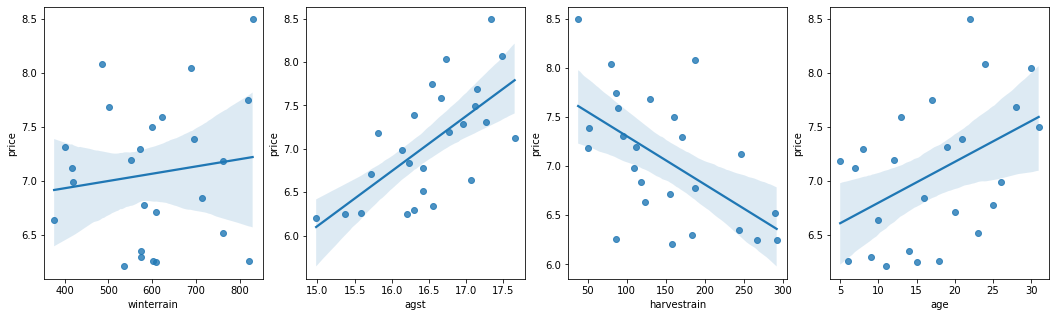

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(18,5))
sns.regplot(x='winterrain',y='price',data=wine, ax=ax[0])
sns.regplot(x='agst',y='price',data=wine, ax=ax[1])
sns.regplot(x='harvestrain',y='price',data=wine, ax=ax[2])
sns.regplot(x='age',y='price',data=wine, ax=ax[3]);

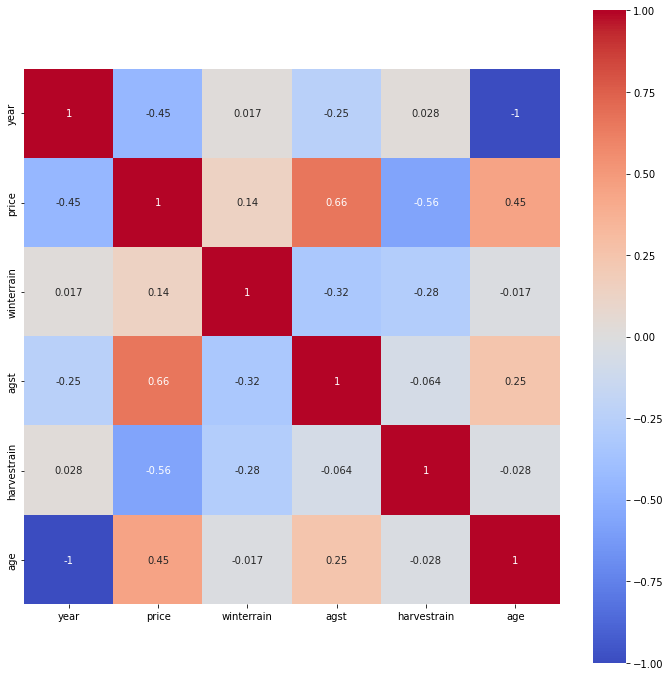

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(wine.corr(), annot=True, square=True, cmap='coolwarm');

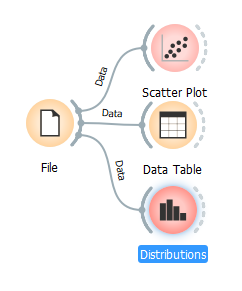

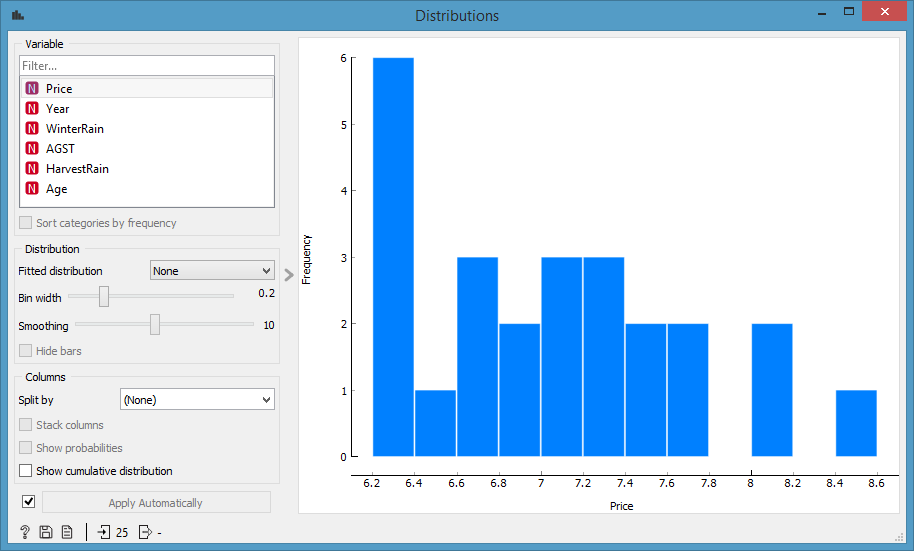

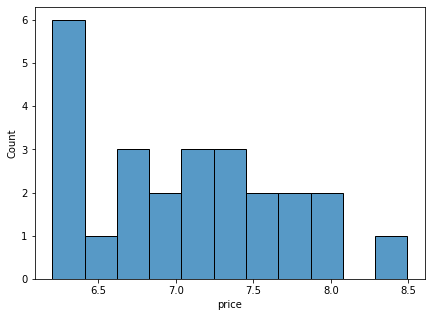

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.despine(f) # уберет окантовку
sns.histplot(x='price', bins=11, data=wine);

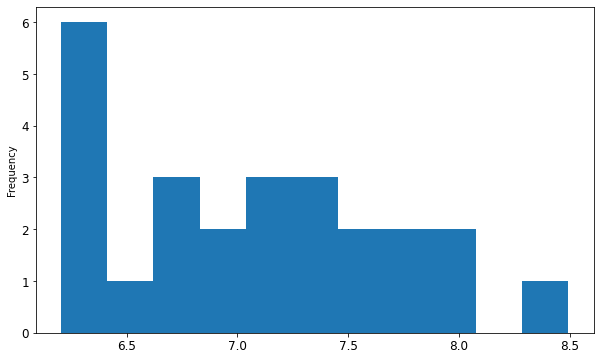

In [ ]:
wine["price"].plot.hist(fontsize=12, bins=11, figsize=(10, 6));

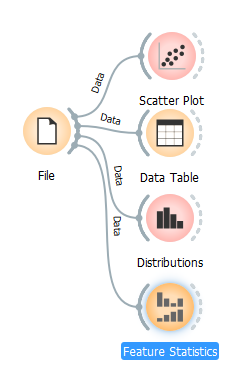

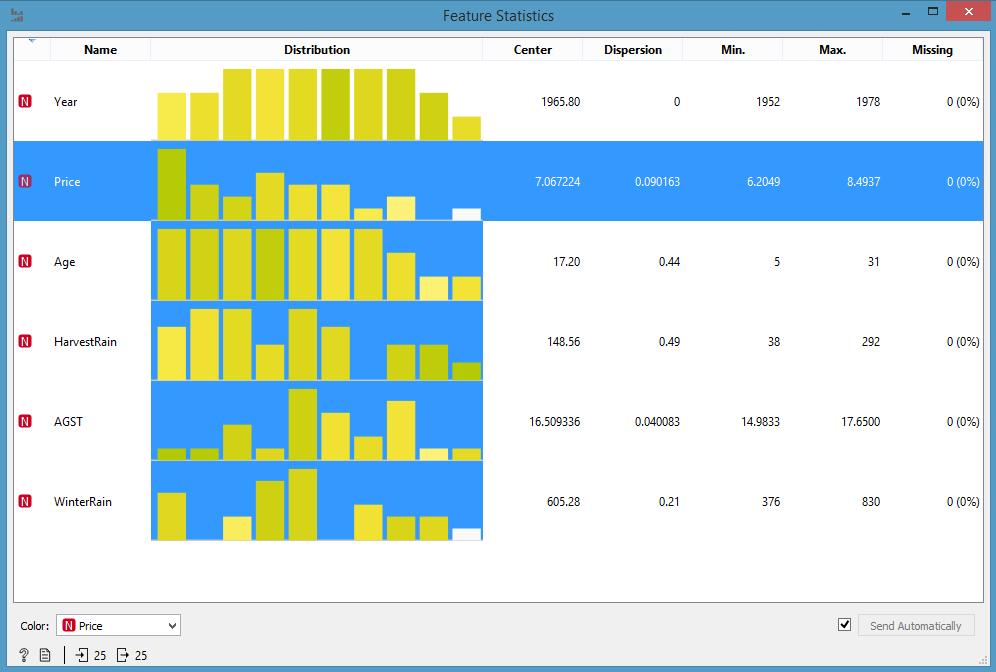

In [ ]:
wine.describe()

,year,price,winterrain,agst,harvestrain,age
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1965.800000,7.067224,605.280000,16.509336,148.560000,17.200000
std,7.691987,0.650341,132.277965,0.675397,74.419464,7.691987
min,1952.000000,6.204900,376.000000,14.983300,38.000000,5.000000
25%,1960.000000,6.518800,536.000000,16.200000,89.000000,11.000000
50%,1966.000000,7.121100,600.000000,16.533300,130.000000,17.000000
75%,1972.000000,7.495000,697.000000,17.066700,187.000000,23.000000
max,1978.000000,8.493700,830.000000,17.650000,292.000000,31.000000


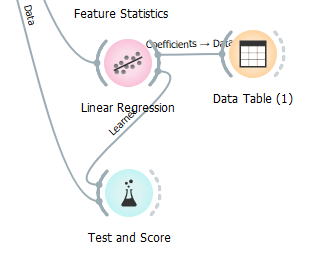

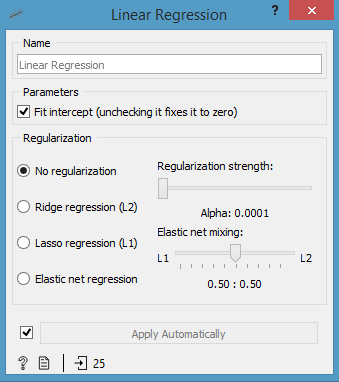

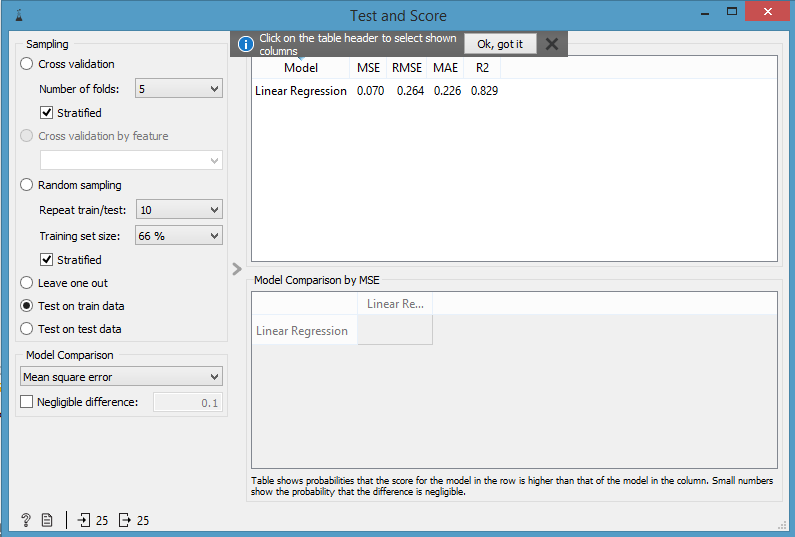

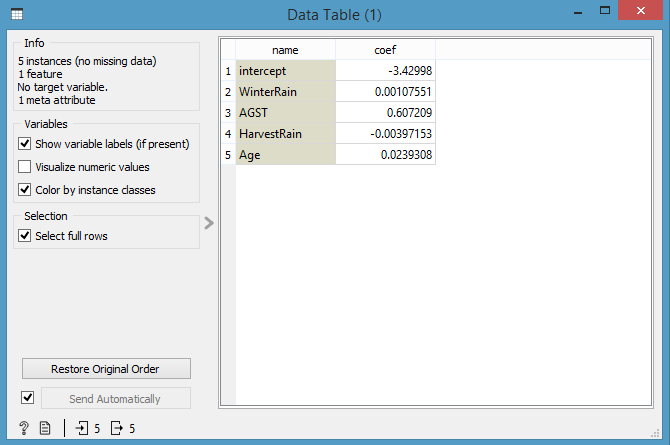

In [ ]:
wine.columns

Index(['year', 'price', 'winterrain', 'agst', 'harvestrain', 'age'], dtype='object')

In [ ]:
final_model = ols(formula='price ~ winterrain + agst + harvestrain + age', data=wine).fit()
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     24.17
Date:                Wed, 29 Sep 2021   Prob (F-statistic):           2.04e-07
Time:                        15:56:40   Log-Likelihood:                -2.1622
No. Observations:                  25   AIC:                             14.32
Df Residuals:                      20   BIC:                             20.42
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -3.4300      1.766     -1.942      

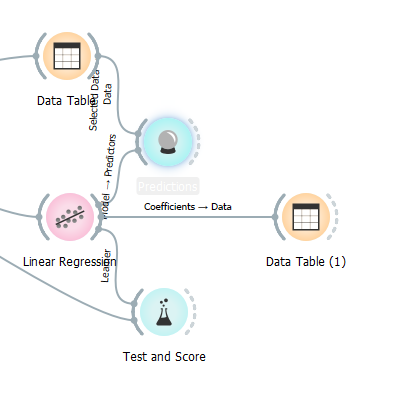

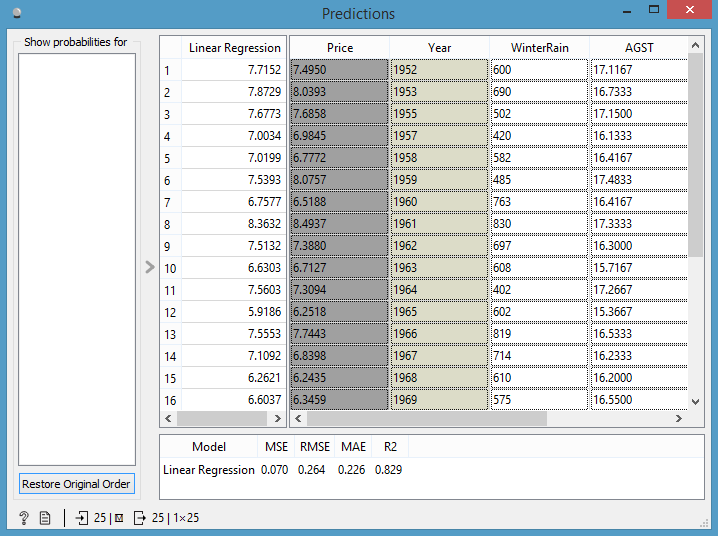

In [ ]:
price_pred = final_model.predict(wine)
price_pred

0     7.715154
1     7.872937
2     7.677328
3     7.003355
4     7.019932
5     7.539326
6     6.757668
7     8.363191
8     7.513187
9     6.630283
10    7.560293
11    5.918633
12    7.555305
13    7.109194
14    6.262144
15    6.603727
16    7.316794
17    7.185878
18    5.880227
19    7.088279
20    6.569487
21    6.989722
22    6.923373
23    6.713397
24    6.911784
dtype: float64

In [ ]:
wine['price_predict'] = price_pred
wine

,year,price,winterrain,agst,harvestrain,age,price_predict
0,1952,7.4950,600,17.1167,160,31,7.715154
1,1953,8.0393,690,16.7333,80,30,7.872937
2,1955,7.6858,502,17.1500,130,28,7.677328
3,1957,6.9845,420,16.1333,110,26,7.003355
4,1958,6.7772,582,16.4167,187,25,7.019932
5,1959,8.0757,485,17.4833,187,24,7.539326
6,1960,6.5188,763,16.4167,290,23,6.757668
7,1961,8.4937,830,17.3333,38,22,8.363191
8,1962,7.3880,697,16.3000,52,21,7.513187
9,1963,6.7127,608,15.7167,155,20,6.630283


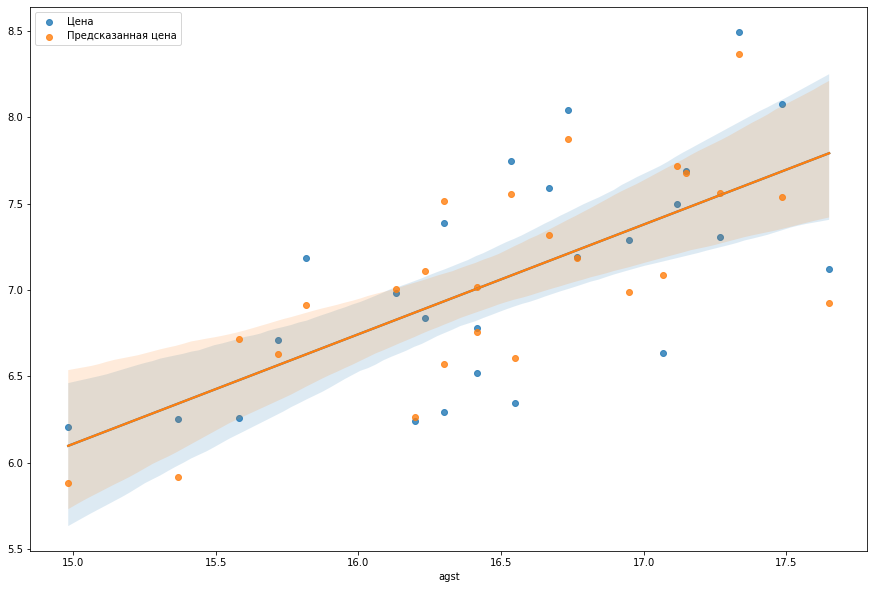

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.regplot(x='agst',y='price',data=wine, label='Цена')
sns.regplot(x='agst',y=price_pred,data=wine, label='Предсказанная цена')
ax.legend();